In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, beta
from tabulate import tabulate

import useful

seed = np.random.seed(11) # seed pour avoir les mêmes résultats

### Création des tables utiles de rating et de secteur

In [13]:
filename = "Credit_Portfolio_withSectors.xls"

# table avec nos différents CDS
CDS_df = pd.read_excel(filename, sheet_name="Portfolio")

# calcul des différents paramètres comme PD, Barrier, Expected Loss
CDS_df, num_secteur_array = useful.compute_parameters(CDS_df)

# calcul des simulations Monte Carlo et de la perte du portfolio par CDS
Loss_Portfolio = useful.compute_MC(CDS_df, num_secteur_array)

In [14]:
# calcul de notre portfolio management
var_precision = 99 
portfolio_mgt, perte_moyenne = useful.compute_portfolio_mgt(Loss_Portfolio, var_precision)

╒════════════════════════╤═════════╕
│ Portfolio Management   │   Value │
╞════════════════════════╪═════════╡
│ Perte Moyenne          │ 15357.4 │
├────────────────────────┼─────────┤
│ VaR (99%)              │ 40470.8 │
├────────────────────────┼─────────┤
│ ESF                    │ 45968.6 │
╘════════════════════════╧═════════╛


In [15]:
# calcul de notre CDO
strike = 0.05
size = 0.02
cdo_mgt = useful.compute_CDO_mgt(Loss_Portfolio, CDS_df, strike, size)

╒══════════════════╤═════════════════════╕
│ CDO Management   │ Value               │
╞══════════════════╪═════════════════════╡
│ Strike           │ 5.0%                │
├──────────────────┼─────────────────────┤
│ Size             │ 2.0%                │
├──────────────────┼─────────────────────┤
│ Price            │ 18.444278533233323% │
╘══════════════════╧═════════════════════╛


## Convergence

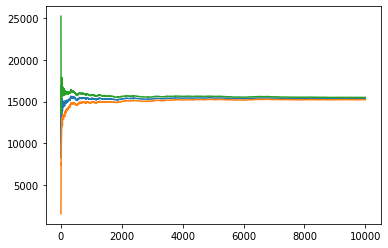

In [16]:
moyenne_glissante = list(pd.Series(Loss_Portfolio).expanding().mean()) # calcul de la moyenne glissante
ecart_type_glissant = list(pd.Series(Loss_Portfolio).expanding().std()) # calcul de l'écart-type glissant

# calcul des intervalles de confiance
ic_moins = [moyenne_glissante[i] - 1.64*ecart_type_glissant[i]/np.sqrt(i) for i in range(len(moyenne_glissante))]
ic_plus = [moyenne_glissante[i] + 1.64*ecart_type_glissant[i]/np.sqrt(i) for i in range(len(moyenne_glissante))]

# liste des abscisse
x = [i for i in range(len(moyenne_glissante))]

plt.plot(x, moyenne_glissante)
plt.plot(x, ic_moins)
plt.plot(x, ic_plus)

plt.show()